# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
        transforms.RandomRotation((-30.0, 30.0), fill=([255.0, 255.0, 255.0,])),
        transforms.ToTensor(),
        transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2470, 0.2435, 0.2616)
        )
])

# Test Phase transformations
test_transforms = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2470, 0.2435, 0.2616)
        )
])

# Dataset and Creating Train/Test Split

In [3]:
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

batch_size=128
kwargs = {
    'batch_size': batch_size,
    'shuffle': True,
    'num_workers': 2,
    'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
kwargs['shuffle']= False
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchsummary import summary
import model
network = model.Net(
    list('CCcPCCCcPCCCGc'),
    [64, 32, 16, 16,
     32, 16, 32, 16, 16,
     32, 16, 32, 32, 10],
    dropout_value=0.10).to('cpu')
summary(network, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]          18,432
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             512
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           4,608
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1, 32,

In [5]:
from torch import optim
from torch.optim.lr_scheduler import StepLR
from model import train, test, plot_loss_n_acc, get_pred_n_actuals
from utils import plot_misclassified_images

device = 'mps:0'
def run_experiment(norm='batch', EPOCHS=20):
    network = model.Net(
        list('CCcPCCCcPCCCGc'),
        [64, 32, 16, 16,
        32, 16, 32, 16, 16,
        32, 16, 32, 32, 10],
        dropout_value=0.10,
        norm=norm).to(device)
    optimizer = optim.SGD(network.parameters(), lr=0.01, momentum=0.95)
    scheduler = StepLR(optimizer, step_size=6, gamma=0.4)

    for epoch in range(EPOCHS):
        print("EPOCH:", epoch)
        model.train(network, device, train_loader, optimizer)
        model.test(network, device, test_loader)
        scheduler.step()

    plot_loss_n_acc()

    labels_df = get_pred_n_actuals(network, test_data, 512, device)

    plot_test_data = datasets.CIFAR10('./data', train=False, download=True,)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck']
    norm = 'batch'
    plot_misclassified_images(labels_df, plot_test_data, 
        title=f"Misclassification - norm:{norm}",
        class_labels=class_labels)

## Batch normalization

EPOCH: 0


Loss=1.6225 Batch_id=390 Accuracy=38.25: 100%|██████████| 391/391 [00:23<00:00, 16.46it/s]


Test set: Average loss: 1.5063, Accuracy: 4553/10000 (45.53%)

EPOCH: 1


Loss=1.1788 Batch_id=390 Accuracy=51.80: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]


Test set: Average loss: 1.2700, Accuracy: 5376/10000 (53.76%)

EPOCH: 2


Loss=1.3215 Batch_id=390 Accuracy=56.13: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]


Test set: Average loss: 1.1753, Accuracy: 5725/10000 (57.25%)

EPOCH: 3


Loss=1.2048 Batch_id=390 Accuracy=59.17: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]


Test set: Average loss: 1.0902, Accuracy: 6086/10000 (60.86%)

EPOCH: 4


Loss=1.0270 Batch_id=390 Accuracy=60.91: 100%|██████████| 391/391 [00:22<00:00, 17.09it/s]


Test set: Average loss: 1.0328, Accuracy: 6287/10000 (62.87%)

EPOCH: 5


Loss=1.1872 Batch_id=390 Accuracy=62.32: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]


Test set: Average loss: 0.9789, Accuracy: 6532/10000 (65.32%)

EPOCH: 6


Loss=1.0648 Batch_id=390 Accuracy=65.09: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]


Test set: Average loss: 0.9335, Accuracy: 6662/10000 (66.62%)

EPOCH: 7


Loss=0.9300 Batch_id=390 Accuracy=65.98: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]


Test set: Average loss: 0.9247, Accuracy: 6724/10000 (67.24%)

EPOCH: 8


Loss=0.8980 Batch_id=390 Accuracy=66.52: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]


Test set: Average loss: 0.9151, Accuracy: 6755/10000 (67.55%)

EPOCH: 9


Loss=0.9296 Batch_id=390 Accuracy=67.22: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]


Test set: Average loss: 0.9048, Accuracy: 6816/10000 (68.16%)

EPOCH: 10


Loss=0.8332 Batch_id=390 Accuracy=67.27: 100%|██████████| 391/391 [00:22<00:00, 17.07it/s]


Test set: Average loss: 0.8821, Accuracy: 6858/10000 (68.58%)

EPOCH: 11


Loss=0.9441 Batch_id=390 Accuracy=67.87: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]


Test set: Average loss: 0.8586, Accuracy: 6915/10000 (69.15%)

EPOCH: 12


Loss=0.8274 Batch_id=390 Accuracy=69.02: 100%|██████████| 391/391 [00:22<00:00, 17.05it/s]


Test set: Average loss: 0.8479, Accuracy: 6979/10000 (69.79%)

EPOCH: 13


Loss=1.0654 Batch_id=390 Accuracy=69.40: 100%|██████████| 391/391 [00:22<00:00, 17.04it/s]


Test set: Average loss: 0.8308, Accuracy: 7036/10000 (70.36%)

EPOCH: 14


Loss=1.0396 Batch_id=390 Accuracy=69.69: 100%|██████████| 391/391 [00:22<00:00, 17.08it/s]


Test set: Average loss: 0.8466, Accuracy: 6991/10000 (69.91%)

EPOCH: 15


Loss=0.8337 Batch_id=390 Accuracy=69.51: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]


Test set: Average loss: 0.8325, Accuracy: 7046/10000 (70.46%)

EPOCH: 16


Loss=0.8650 Batch_id=390 Accuracy=69.92: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]


Test set: Average loss: 0.8079, Accuracy: 7125/10000 (71.25%)

EPOCH: 17


Loss=1.1086 Batch_id=390 Accuracy=69.86: 100%|██████████| 391/391 [00:23<00:00, 16.97it/s]


Test set: Average loss: 0.8151, Accuracy: 7138/10000 (71.38%)

EPOCH: 18


Loss=0.8094 Batch_id=390 Accuracy=70.55: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]


Test set: Average loss: 0.8157, Accuracy: 7089/10000 (70.89%)

EPOCH: 19


Loss=0.9836 Batch_id=390 Accuracy=70.84: 100%|██████████| 391/391 [00:23<00:00, 16.72it/s]


Test set: Average loss: 0.8015, Accuracy: 7137/10000 (71.37%)

Files already downloaded and verified


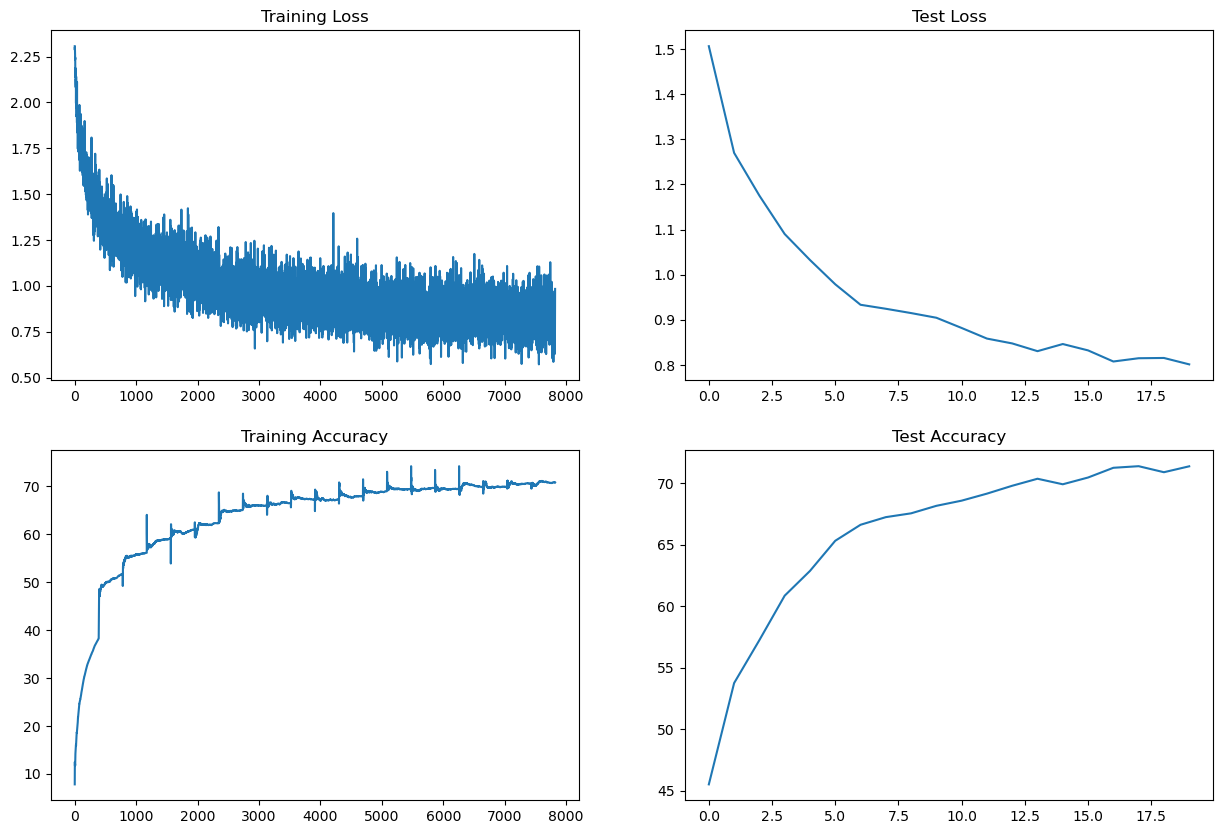

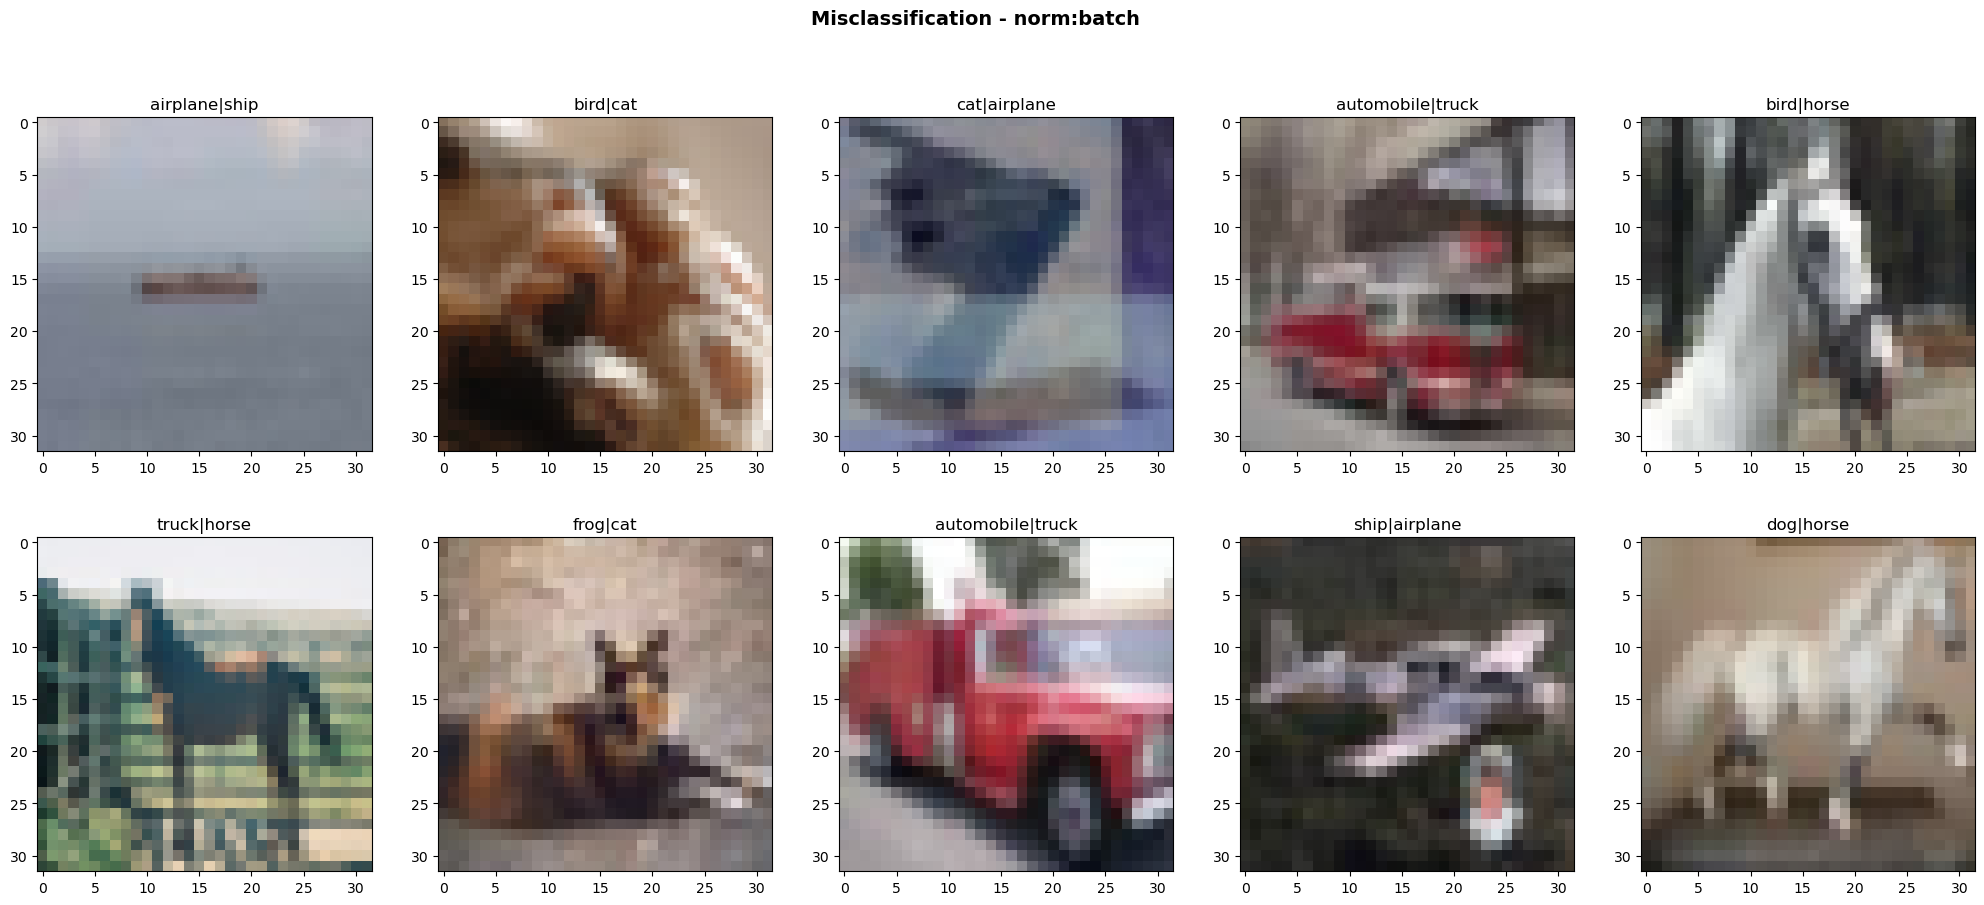

In [8]:
run_experiment(norm='batch')

## Layer Normalization

EPOCH: 0


Loss=1.5229 Batch_id=390 Accuracy=32.35: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s]


Test set: Average loss: 1.5960, Accuracy: 4032/10000 (40.32%)

EPOCH: 1


Loss=1.3862 Batch_id=390 Accuracy=44.46: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 1.4016, Accuracy: 4838/10000 (48.38%)

EPOCH: 2


Loss=1.2345 Batch_id=390 Accuracy=50.51: 100%|██████████| 391/391 [10:39<00:00,  1.64s/it]


Test set: Average loss: 1.3097, Accuracy: 5283/10000 (52.83%)

EPOCH: 3


Loss=1.5114 Batch_id=390 Accuracy=54.18: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Test set: Average loss: 1.1730, Accuracy: 5783/10000 (57.83%)

EPOCH: 4


Loss=1.1515 Batch_id=390 Accuracy=56.32: 100%|██████████| 391/391 [00:27<00:00, 14.12it/s]


Test set: Average loss: 1.1384, Accuracy: 5884/10000 (58.84%)

EPOCH: 5


Loss=1.0912 Batch_id=390 Accuracy=58.46: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Test set: Average loss: 1.1533, Accuracy: 5999/10000 (59.99%)

EPOCH: 6


Loss=1.1208 Batch_id=390 Accuracy=62.01: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Test set: Average loss: 1.0098, Accuracy: 6368/10000 (63.68%)

EPOCH: 7


Loss=1.0299 Batch_id=390 Accuracy=62.60: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.9990, Accuracy: 6471/10000 (64.71%)

EPOCH: 8


Loss=0.9156 Batch_id=390 Accuracy=63.59: 100%|██████████| 391/391 [00:27<00:00, 14.15it/s]


Test set: Average loss: 0.9521, Accuracy: 6644/10000 (66.44%)

EPOCH: 9


Loss=1.0095 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.9348, Accuracy: 6616/10000 (66.16%)

EPOCH: 10


Loss=0.9648 Batch_id=390 Accuracy=64.82: 100%|██████████| 391/391 [00:27<00:00, 14.18it/s]


Test set: Average loss: 0.9423, Accuracy: 6654/10000 (66.54%)

EPOCH: 11


Loss=0.9493 Batch_id=390 Accuracy=65.00: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]


Test set: Average loss: 0.9604, Accuracy: 6622/10000 (66.22%)

EPOCH: 12


Loss=0.9065 Batch_id=390 Accuracy=66.84: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Test set: Average loss: 0.8953, Accuracy: 6842/10000 (68.42%)

EPOCH: 13


Loss=0.9426 Batch_id=390 Accuracy=67.25: 100%|██████████| 391/391 [00:27<00:00, 14.15it/s]


Test set: Average loss: 0.8838, Accuracy: 6845/10000 (68.45%)

EPOCH: 14


Loss=0.8043 Batch_id=390 Accuracy=67.66: 100%|██████████| 391/391 [00:27<00:00, 14.17it/s]


Test set: Average loss: 0.8588, Accuracy: 6983/10000 (69.83%)

EPOCH: 15


Loss=0.6902 Batch_id=390 Accuracy=67.85: 100%|██████████| 391/391 [00:27<00:00, 14.15it/s]


Test set: Average loss: 0.8921, Accuracy: 6852/10000 (68.52%)

EPOCH: 16


Loss=0.8730 Batch_id=390 Accuracy=67.91: 100%|██████████| 391/391 [00:27<00:00, 14.16it/s]


Test set: Average loss: 0.8754, Accuracy: 6940/10000 (69.40%)

EPOCH: 17


Loss=1.0630 Batch_id=390 Accuracy=68.15: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]


Test set: Average loss: 0.8560, Accuracy: 6995/10000 (69.95%)

EPOCH: 18


Loss=0.6544 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:28<00:00, 13.92it/s]


Test set: Average loss: 0.8212, Accuracy: 7121/10000 (71.21%)

EPOCH: 19


Loss=1.0712 Batch_id=390 Accuracy=69.12: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]


Test set: Average loss: 0.8374, Accuracy: 7050/10000 (70.50%)

Files already downloaded and verified


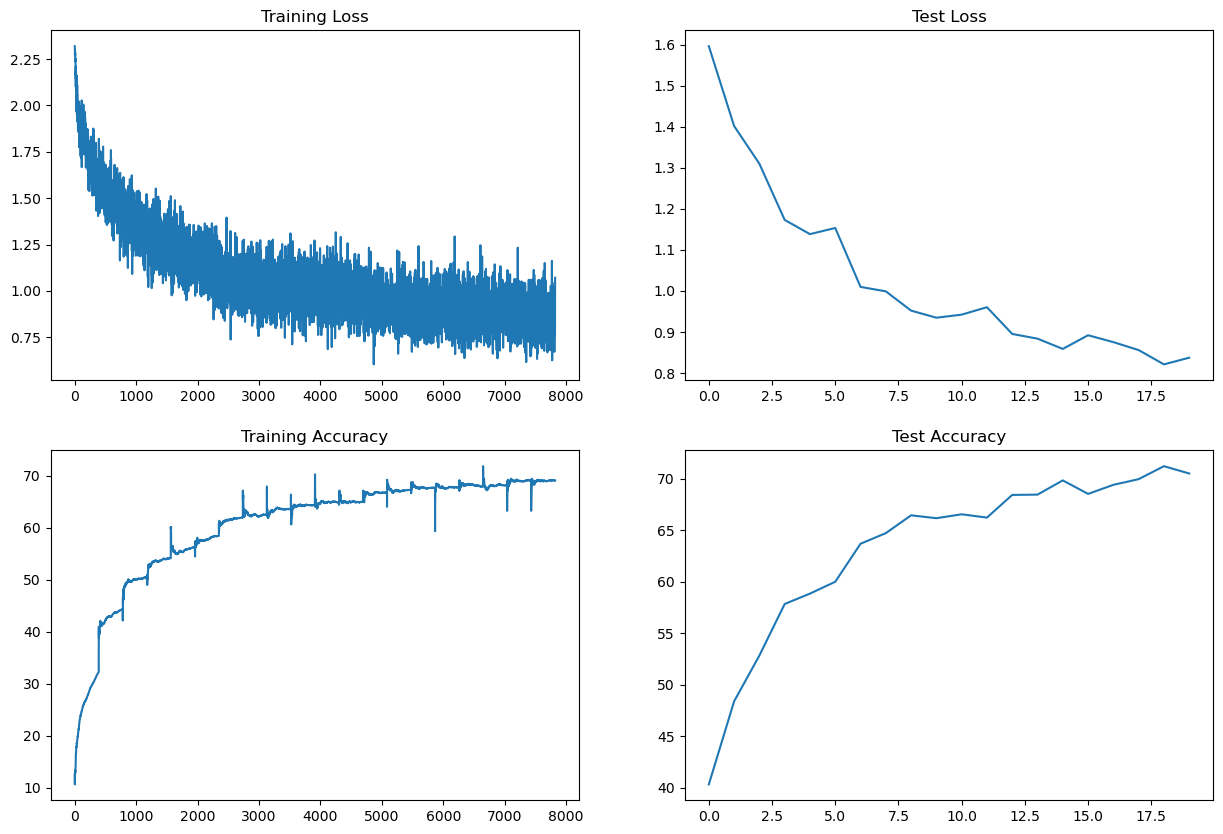

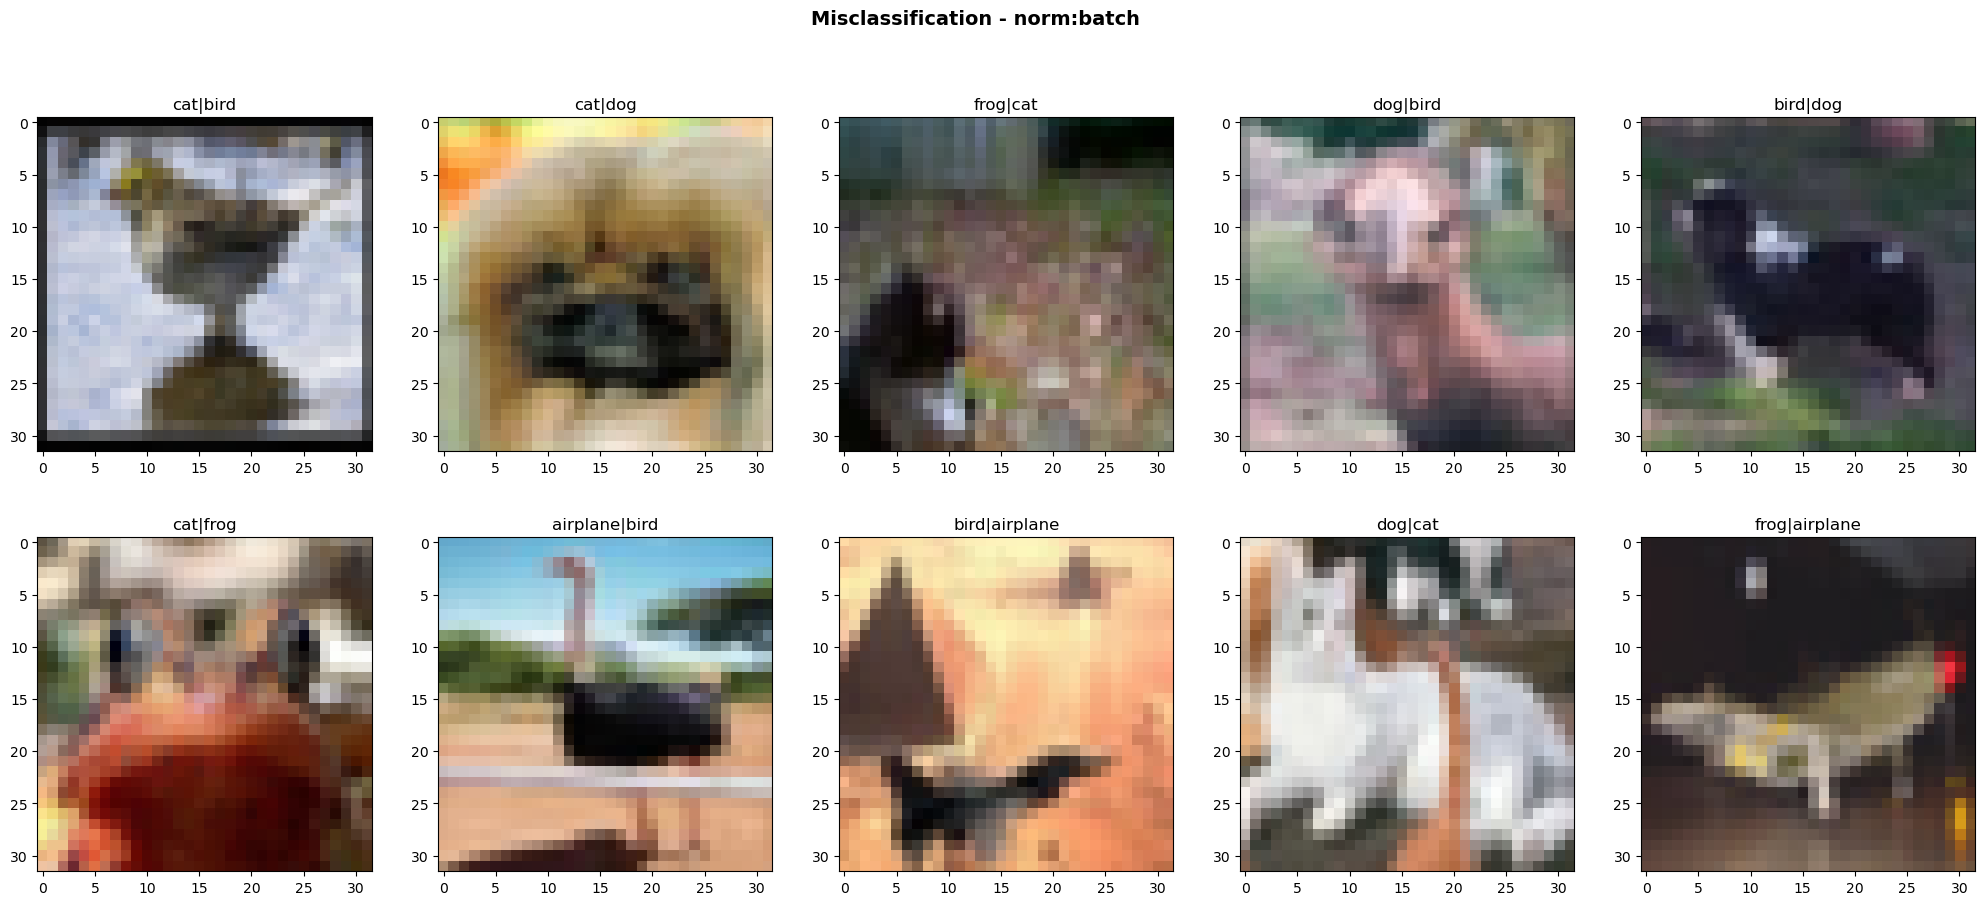

In [7]:
run_experiment(norm='layer')

## Group normalization

EPOCH: 0


Loss=1.5601 Batch_id=390 Accuracy=28.77: 100%|██████████| 391/391 [00:29<00:00, 13.34it/s]


Test set: Average loss: 1.6354, Accuracy: 3874/10000 (38.74%)

EPOCH: 1


Loss=1.4373 Batch_id=390 Accuracy=43.55: 100%|██████████| 391/391 [00:28<00:00, 13.73it/s]


Test set: Average loss: 1.3913, Accuracy: 4813/10000 (48.13%)

EPOCH: 2


Loss=1.0975 Batch_id=390 Accuracy=49.70: 100%|██████████| 391/391 [00:28<00:00, 13.75it/s]


Test set: Average loss: 1.3180, Accuracy: 5280/10000 (52.80%)

EPOCH: 3


Loss=1.2575 Batch_id=390 Accuracy=53.82: 100%|██████████| 391/391 [00:28<00:00, 13.77it/s]


Test set: Average loss: 1.2094, Accuracy: 5630/10000 (56.30%)

EPOCH: 4


Loss=1.2411 Batch_id=390 Accuracy=56.41: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s]


Test set: Average loss: 1.1330, Accuracy: 5965/10000 (59.65%)

EPOCH: 5


Loss=1.1645 Batch_id=390 Accuracy=58.62: 100%|██████████| 391/391 [00:28<00:00, 13.84it/s]


Test set: Average loss: 1.0772, Accuracy: 6116/10000 (61.16%)

EPOCH: 6


Loss=0.9825 Batch_id=390 Accuracy=62.65: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 1.0333, Accuracy: 6304/10000 (63.04%)

EPOCH: 7


Loss=0.8657 Batch_id=390 Accuracy=63.18: 100%|██████████| 391/391 [00:28<00:00, 13.88it/s]


Test set: Average loss: 0.9991, Accuracy: 6483/10000 (64.83%)

EPOCH: 8


Loss=1.0258 Batch_id=390 Accuracy=64.23: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s]


Test set: Average loss: 0.9542, Accuracy: 6639/10000 (66.39%)

EPOCH: 9


Loss=0.9352 Batch_id=390 Accuracy=64.78: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]


Test set: Average loss: 0.9459, Accuracy: 6616/10000 (66.16%)

EPOCH: 10


Loss=1.2412 Batch_id=390 Accuracy=65.47: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]


Test set: Average loss: 0.9144, Accuracy: 6752/10000 (67.52%)

EPOCH: 11


Loss=1.0654 Batch_id=390 Accuracy=65.76: 100%|██████████| 391/391 [00:28<00:00, 13.80it/s]


Test set: Average loss: 0.9479, Accuracy: 6688/10000 (66.88%)

EPOCH: 12


Loss=0.9264 Batch_id=390 Accuracy=67.60: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]


Test set: Average loss: 0.8937, Accuracy: 6864/10000 (68.64%)

EPOCH: 13


Loss=0.8869 Batch_id=390 Accuracy=67.93: 100%|██████████| 391/391 [00:28<00:00, 13.81it/s]


Test set: Average loss: 0.9042, Accuracy: 6823/10000 (68.23%)

EPOCH: 14


Loss=1.0261 Batch_id=390 Accuracy=68.19: 100%|██████████| 391/391 [16:29<00:00,  2.53s/it]


Test set: Average loss: 0.8818, Accuracy: 6926/10000 (69.26%)

EPOCH: 15


Loss=0.8541 Batch_id=390 Accuracy=68.27: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]


Test set: Average loss: 0.8677, Accuracy: 6967/10000 (69.67%)

EPOCH: 16


Loss=0.9108 Batch_id=390 Accuracy=68.42: 100%|██████████| 391/391 [00:28<00:00, 13.87it/s]


Test set: Average loss: 0.8617, Accuracy: 6986/10000 (69.86%)

EPOCH: 17


Loss=0.8404 Batch_id=390 Accuracy=68.83: 100%|██████████| 391/391 [09:01<00:00,  1.38s/it]


Test set: Average loss: 0.8573, Accuracy: 6952/10000 (69.52%)

EPOCH: 18


Loss=0.8609 Batch_id=390 Accuracy=69.59: 100%|██████████| 391/391 [00:28<00:00, 13.67it/s]


Test set: Average loss: 0.8379, Accuracy: 7055/10000 (70.55%)

EPOCH: 19


Loss=0.9644 Batch_id=390 Accuracy=69.94: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s]


Test set: Average loss: 0.8437, Accuracy: 7016/10000 (70.16%)

Files already downloaded and verified


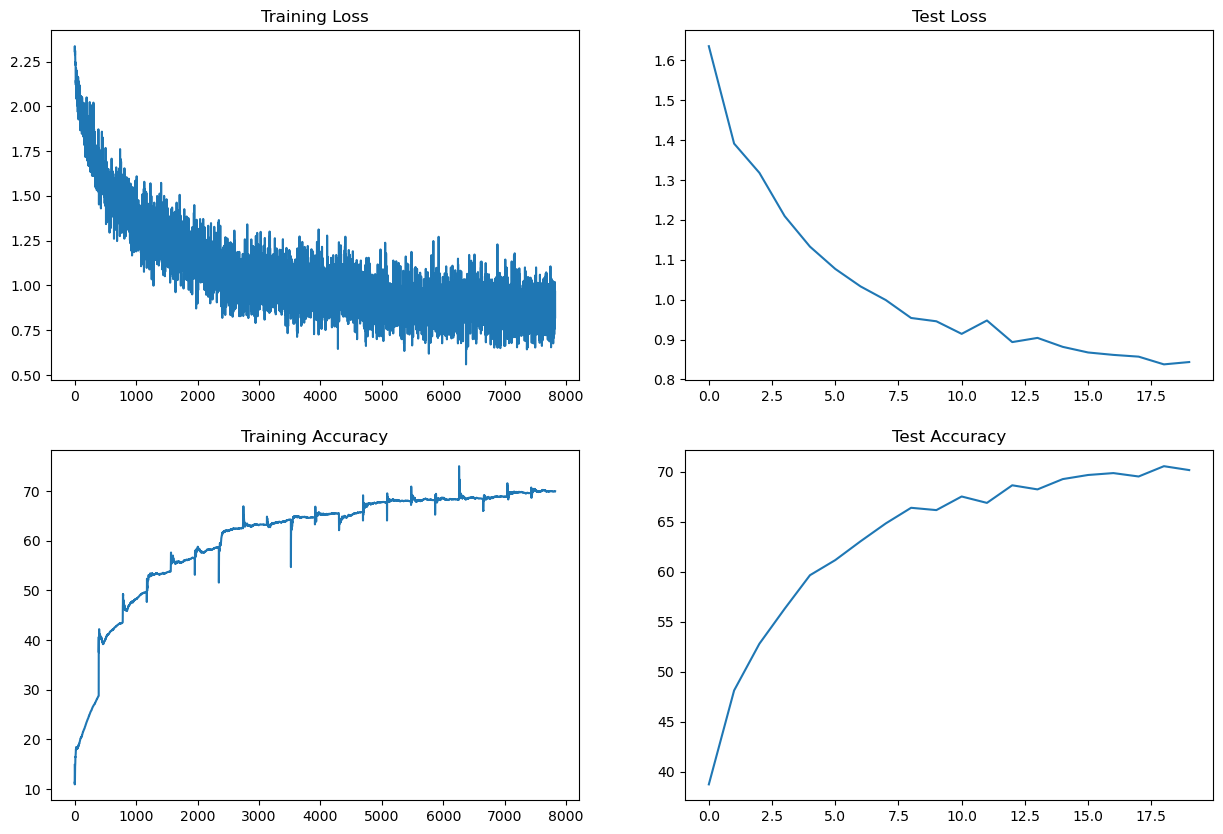

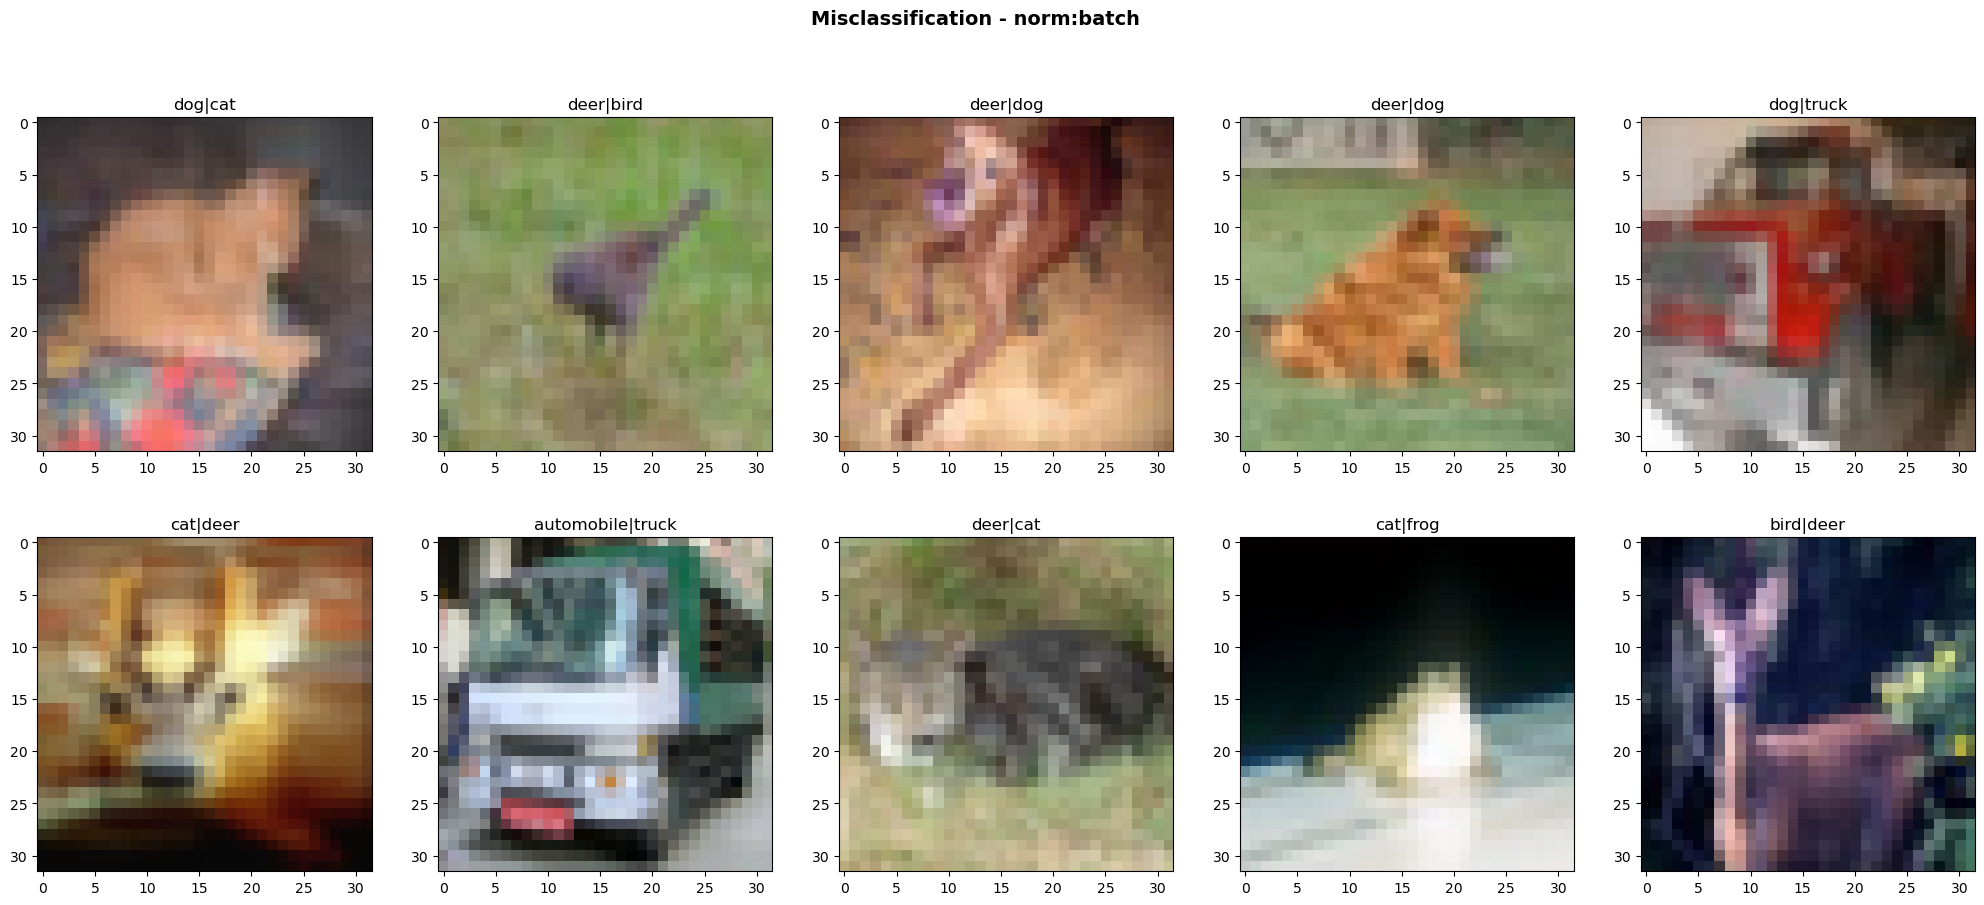

In [6]:
run_experiment(norm='group') # default number of groups = 4; see models.py